In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [109]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [110]:
import confusion_matrix_pretty_print as cmpp

In [111]:
X_train = pd.read_csv('../subset/X_winetrain.csv', index_col=0)
X_test = pd.read_csv('../subset/X_winetest.csv', index_col=0)
y_train = pd.read_csv('../subset/y_winetrain.csv', header=None, index_col=0, squeeze=True)
y_test = pd.read_csv('../subset/y_winetest.csv', header=None, index_col=0, squeeze=True)

In [112]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 11)
(5197,)
(1300, 11)
(1300,)


In [113]:
from sklearn import tree

In [114]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=4, max_depth=5)

In [115]:
%time clf.fit(X_train,y_train)

CPU times: user 17.9 ms, sys: 746 µs, total: 18.7 ms
Wall time: 19.2 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [116]:
y_pred = clf.predict(X_test)

In [117]:
metrics.accuracy_score(y_test, y_pred)

0.5553846153846154

In [118]:
y_test.value_counts()

1    654
0    399
2    247
Name: 1, dtype: int64

# Null Accuracy

In [119]:
y_test.value_counts().head(1) / y_test.count()

1    0.503077
Name: 1, dtype: float64

# Confusion Matrix

In [120]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[249 136  14]
 [131 363 160]
 [ 21 116 110]]


In [121]:
labels = ['Ok','Good','Great']
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

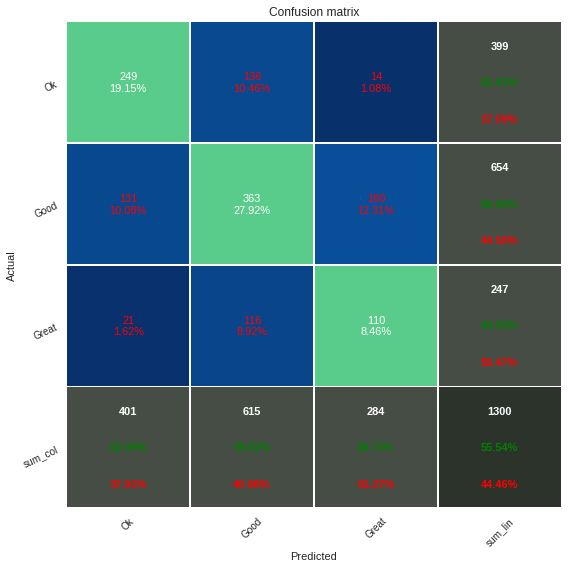

In [122]:
cmpp.pretty_plot_confusion_matrix(df_cm, cmap="Blues_r", show_null_values=1, pred_val_axis='x')

In [123]:
cm.sum(axis=1)

array([399, 654, 247])

In [124]:
np.diag(cm)

array([249, 363, 110])

In [125]:
cm.sum(axis=1) - np.diag(cm)

array([150, 291, 137])

## When Actual = Rows and Predicted = Columns
## TP: Diagonal top left to bottom right
## TN: Values in all columns and rows excluding given Class column and row
## FP: Values in column excluding TP
## FN: Values in row excluding TP

In [126]:
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)

print(TP)
print(FP)
print(FN)
print(TN)

[249 363 110]
[152 252 174]
[150 291 137]
[749 394 879]


## Accuracy: How often correct?  _Diagonal / Total_

In [127]:
print(metrics.accuracy_score(y_test,y_pred))
print(TP.sum() / cm.sum())

0.5553846153846154
0.5553846153846154


## Classification Error: How often incorrect? _Non-Diagonal / Total_

In [128]:
print(1 - metrics.accuracy_score(y_test,y_pred))
print((cm.sum() - np.diag(cm).sum()) / cm.sum())

0.44461538461538463
0.44461538461538463


## Precision: When a positive value is predicted, how often is it correct? _TP / Column Total_

In [129]:
print(metrics.precision_score(y_test,y_pred, average=None))
print(TP / (TP + FP))

[0.62094763 0.5902439  0.38732394]
[0.62094763 0.5902439  0.38732394]


## Sensitivity (Recall or TPR): When actual value is positive, how often is prediction correct? _TP / Row Total_

In [130]:
print(metrics.recall_score(y_test,y_pred, average=None))
print(TP/(TP+FN))

[0.62406015 0.55504587 0.44534413]
[0.62406015 0.55504587 0.44534413]


## False Positive Rate FP / float(TN + FP)
=1 - Specificty

In [131]:
print(FP / (TN + FP))

[0.16870144 0.39009288 0.16524217]


## Specifity TN / float(TN + FP)
When the actual value is negative, how often is the prediction correct?

In [132]:
print(TN / (TN + FP))
print([1,1,1] - (FP / (TN + FP)))

[0.83129856 0.60990712 0.83475783]
[0.83129856 0.60990712 0.83475783]


In [133]:
metrics.matthews_corrcoef(y_test,y_pred)

0.2899749457033964

#### https://www.researchgate.net/post/Multiclass_Confusion_Matrix_Explanation

In [134]:
X_train.shape

(5197, 11)

In [135]:
X = pd.read_csv('../subset/X_wine.csv', index_col=0)
y = pd.read_csv('../subset/y_wine.csv', header=None, index_col=0, squeeze=True)

In [136]:
print(X.shape)
print(y.shape)

(6497, 11)
(6497,)


In [151]:
clf.max_depth = 5

In [137]:
train_sizes = [50,520,1300,2600,3900,5196]
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [138]:
print(train_scores)
print(validation_scores)

[[1.         0.94       0.94       0.94       0.94      ]
 [0.87307692 0.76153846 0.76153846 0.76153846 0.76153846]
 [0.68692308 0.69769231 0.68923077 0.68923077 0.68923077]
 [0.63807692 0.64115385 0.65269231 0.64076923 0.64076923]
 [0.6225641  0.62461538 0.60692308 0.62666667 0.61897436]
 [0.6139338  0.62702079 0.60892995 0.61528099 0.60334873]]
[[0.36664105 0.36692308 0.44033872 0.2717475  0.46610169]
 [0.41275942 0.50153846 0.40184758 0.44803695 0.43528505]
 [0.47425058 0.42153846 0.47190146 0.50500385 0.50077042]
 [0.45964643 0.43076923 0.50885296 0.49191686 0.46918336]
 [0.48039969 0.46307692 0.54503464 0.51732102 0.5046225 ]
 [0.46348962 0.50384615 0.53117783 0.57736721 0.57627119]]


In [139]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [140]:
print(pd.Series(train_scores_mean, index=train_sizes))
print()
print(pd.Series(validation_scores_mean, index=train_sizes))

50      0.952000
520     0.783846
1300    0.690462
2600    0.642692
3900    0.619949
5196    0.613703
dtype: float64

50      0.382350
520     0.439893
1300    0.474693
2600    0.472074
3900    0.502091
5196    0.530430
dtype: float64


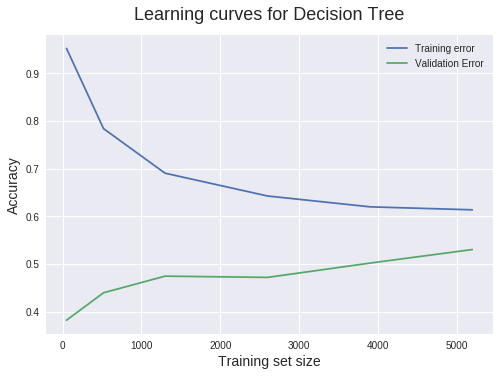

In [141]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [150]:
clf.max_depth = 10

In [142]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [143]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

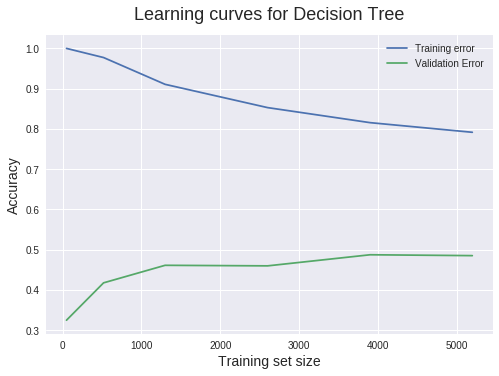

In [144]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [ ]:
max_depth = range(1,31)
min_samples_leaf = range(1,6)
min_samples_split = range(1,5)

param_grid = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)



In [ ]:
grid = GridSearchCV(clf, param_grid, scoring='accuracy')

